# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS24/25**  
**Bielefeld University**  
**Alina Deriyeva, Adia Khalid, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-11-04**  
**Exercise Sheet Submission Deadline: Friday, 2024-11-15, noon (i.e. 12:00), via moodle**

**NOTE** The use of language models/AI tools is permitted under three conditions
1. transparency: you tell us that you used them
2. accountability: you take full responsibility for the submission, can explain and defend it
3. privacy: you do not transmit any private information to any external tool

We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool for research purposes.

### Task 02.01

Assume we have some encoding function $\phi : R^n \to R$ which maps input data points to single numbers in the latent space. Further, assume we want to find a linear decoding function $\psi(z) = w \cdot z$ which maps numbers in the latent space back to the input space such that the squared reconstruction error for an input data set $x_1, \ldots, x_N \in R^n$ is minimized.

Formalize this problem as a minimization problem.

For any point $x_i$, the squared reconstruction error can be computed as $|| x_i - \hat{x_i}||^2 = || x_i - \psi(z_i)||^2 = || x_i - w \cdot z_i||^2 = || x_i - w \cdot \phi(x_i)||^2$\
Where $\hat{x_i}$ is the reconstructed mapping of $x_i$ from the latent space $R$.

As such, we can computed the loss with a given $w$ as $\mathcal{L}(w) = \sum_{i=1}^N || x_i - w \cdot \phi(x_i)||^2$.

To formalize this as a minimization problem, we want to find $w$ such that $\mathcal{L}(w)$ is minimized.\
This yields: $\text{argmin}_{w \in R^n} \mathcal{L}(w) = \text{argmin}_{w \in R^n} \sum_{i=1}^N \| x_i - w \cdot \phi(x_i) \|^2$

### Task 02.02

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \cdot \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \cdot \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal value for $\mu_k$.

**HINT:** You may use the following general matrix/vector gradient equation (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y)
\end{align*}

\begin{align*}
Q = & \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \cdot \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \cdot \Big(\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\Big) + \gamma_{k,i} \cdot \Big( \frac{1}{2}\log[2\pi \det(\Sigma_k)]  - \log[p_Z(k)] \Big)
\\
=& \sum_{k=1}^K \sum_{i=1}^N \gamma_{k,i} \cdot \Big(\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\Big) + \gamma_{k,i} \cdot \Big( \frac{1}{2}\log[2\pi \det(\Sigma_k)]  - \log[p_Z(k)] \Big)
\end{align*}

We will now construct the derivative of Q in respect to $\mu_k$, which means we will have to take a look at the inner sum (since all other terms disappear).

\begin{align*}
\dfrac{\partial Q}{\partial \mu_k} &= \dfrac{\partial}{\partial \mu_k} \sum_{i=1}^N \gamma_{k,i} \cdot \Big(\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\Big) + \gamma_{k,i} \cdot \Big( \frac{1}{2}\log[2\pi \det(\Sigma_k)]  - \log[p_Z(k)] \Big)
\\
&= \dfrac{\partial}{\partial \mu_k} \sum_{i=1}^N \gamma_{k,i} \cdot \Big(\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\Big)
\\
&= \sum_{i=1}^N \dfrac{\partial}{\partial \mu_k} \frac{\gamma_{k,i}}{2} \cdot \Big( (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\Big)
\\
&= \sum_{i=1}^N  \frac{\gamma_{k,i}}{2} \cdot - 2\Sigma_k^{-1}(x_i - \mu_k)
\\
&= -\sum_{i=1}^N \gamma_{k,i} \cdot \Sigma_k^{-1}(x_i - \mu_k)
\end{align*}

We now set the derivative to 0

\begin{align*}
0 &= -\sum_{i=1}^N \gamma_{k,i} \cdot \Sigma_k^{-1}(x_i - \mu_k)
\\
\Leftrightarrow 0 &= -\Sigma_k^{-1} \sum_{i=1}^N \gamma_{k,i} \cdot (x_i - \mu_k)
\\
\Leftrightarrow 0 &= \sum_{i=1}^N \gamma_{k,i} \cdot (x_i - \mu_k)
\\
\Leftrightarrow 0 &= \sum_{i=1}^N \gamma_{k,i} x_i - \gamma_{k,i} \mu_k
\\
\Leftrightarrow \sum_{i=1}^N \gamma_{k,i} \mu_k &= \sum_{i=1}^N \gamma_{k,i} x_i 
\\
\Leftrightarrow \mu_k &= \dfrac{ \sum_{i=1}^N \gamma_{k,i} x_i }{\sum_{i=1}^N \gamma_{k,i}}
\end{align*}

Since Q is convex, this yields the global minima for $\mu_k$

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following code loads this raw data and prints it.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

X = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ... nan nan nan]
 [ 7.  3.  2. ... 66. 57. nan]
 ...
 [ 0.  0.  0. ... 30. nan nan]
 [ 1.  0.  0. ... nan nan nan]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.03

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [36]:
import math

X_imputed = X.copy()

for i, student in enumerate(X_imputed):
    student_mean = np.nanmean(student[4:])
    if math.isnan(student_mean):
        student_mean = 0
        
    for j, task in enumerate(student[4:]):
        if not math.isnan(task):
            continue
        X_imputed[i, j+4] = student_mean

print(X_imputed)

[[ 3.          1.          1.         ... 56.         61.
  60.        ]
 [ 0.          0.          0.         ... 24.5        24.5
  24.5       ]
 [ 7.          3.          2.         ... 66.         57.
  60.75      ]
 ...
 [ 0.          0.          0.         ... 30.         30.66666667
  30.66666667]
 [ 1.          0.          0.         ... 13.         13.
  13.        ]
 [ 3.          0.          1.         ... 40.         35.
  40.        ]]


/tmp/ipykernel_50782/2628459068.py:6: RuntimeWarning: Mean of empty slice
  student_mean = np.nanmean(student[4:])


### Task 02.04

Next, normalize the data by dividing by the maximum value in each column.

In [37]:
max_points = X_imputed[:, 4:].max(axis=0)
X_normalized = X_imputed.copy()

X_normalized[:, 4:] = X_normalized[:, 4:]/max_points

print(X_normalized)

[[3.         1.         1.         ... 0.70886076 0.7721519  0.76923077]
 [0.         0.         0.         ... 0.31012658 0.31012658 0.31410256]
 [7.         3.         2.         ... 0.83544304 0.72151899 0.77884615]
 ...
 [0.         0.         0.         ... 0.37974684 0.38818565 0.39316239]
 [1.         0.         0.         ... 0.16455696 0.16455696 0.16666667]
 [3.         0.         1.         ... 0.50632911 0.44303797 0.51282051]]


## Principal Component Analysis

### Task 02.05

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=0, the second-largest on x=1, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

Total sum of eigenvalues:          ~32.74617
Sum of first two eigenvalues:      ~11.74765
Coverage of first two eigenvalues: ~35.87488%


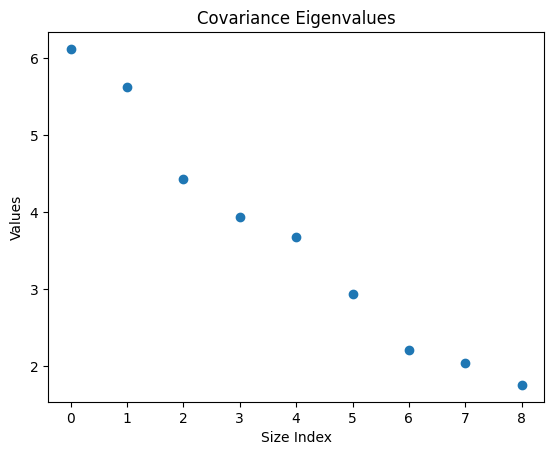

In [38]:
rotated_X_normalized = X_normalized.reshape(X_normalized.shape[::-1]) # Turn columns to rows

covariance_matrix = np.cov(rotated_X_normalized)
eigenvalues_cov, eigenvectors_cov = np.linalg.eig(covariance_matrix)

eigenvalues_cov = -np.sort(-eigenvalues_cov) # Sort descending

eigenvalues_sum = np.sum(eigenvalues_cov)
eigenvalues_one_two = np.sum(eigenvalues_cov[0:2])

print(f"Total sum of eigenvalues:          ~{eigenvalues_sum:.5f}")
print(f"Sum of first two eigenvalues:      ~{eigenvalues_one_two:.5f}")
print(f"Coverage of first two eigenvalues: ~{eigenvalues_one_two/eigenvalues_sum * 100:.5f}%")



fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter([i for i, _ in enumerate(eigenvalues_cov)], eigenvalues_cov)
ax1.set_ylabel('Values')
ax1.set_xlabel('Size Index')
ax1.set_title('Covariance Eigenvalues')

plt.show()

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

Text(0.5, 1.0, 'PCA Latent Space')

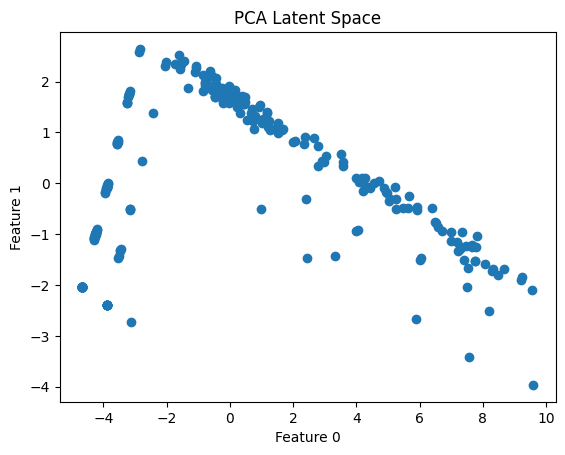

In [39]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X_normalized)

X_latent_2d = pca.transform(X_normalized)

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(X_latent_2d[:, 0], X_latent_2d[:, 1])
ax1.set_ylabel('Feature 1')
ax1.set_xlabel('Feature 0')
ax1.set_title('PCA Latent Space')

## Factor Analysis

### Task 02.07

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

Text(0.5, 1.0, 'Factor Analysis Latent Space')

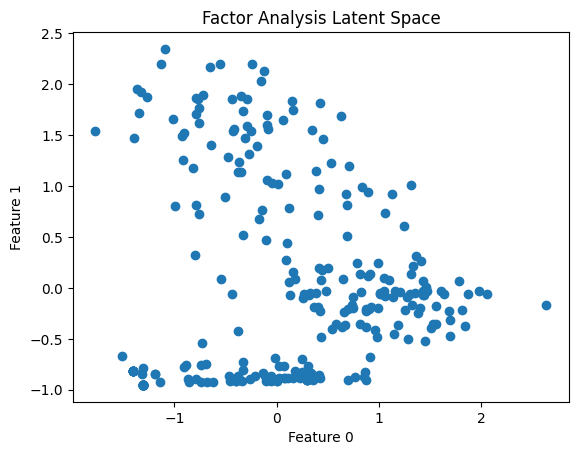

In [40]:
from sklearn.decomposition import FactorAnalysis


factor_analysis = FactorAnalysis(n_components=2, rotation="varimax")
factor_analysis.fit(X_normalized)

X_latent_2d = factor_analysis.transform(X_normalized)

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(X_latent_2d[:, 0], X_latent_2d[:, 1])
ax1.set_ylabel('Feature 1')
ax1.set_xlabel('Feature 0')
ax1.set_title('Factor Analysis Latent Space')

**ANSWER:**

We can see that the factor analysis results in three broad cluster, which are slightly defuse, whether the PCA yields 2 linear lines.\
The axis are also much smaller for the factor analysis, with values from -1.5 to 3 and -1 to 2.5 respectively. With PCA, we get axis from -4 to 10 and -4 to 2.\
This means that Factor Analysis actually yields some usable clusters.

### Task 02.08

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [41]:
factors = factor_analysis.components_

for i, factor in enumerate(factors):
    heavy_weights = np.where(abs(factor) >= 1)[0]
    small_weights = np.where((abs(factor) > 0.1) & (abs(factor) < 1))[0]

    print("-"*30)
    print(f"\nFactor {i} probably represents these features strongly: (>1)")
    for weight_index in heavy_weights:
        print(f"Feature {weight_index}: {features[weight_index]} ({factor[weight_index]:.2f}) {'(inversely)' if factor[weight_index] < 0 else ''}")
        
    print("\nWith some light weighting of: (>0.1)")
    for weight_index in small_weights:
        print(f"Feature {weight_index}: {features[weight_index]} ({factor[weight_index]:.2f}) {'(inversely)' if factor[weight_index] < 0 else ''}")
    print( "-"*30, "\n")

------------------------------

Factor 0 probably represents these features strongly: (>1)
Feature 3: num_completed_tasks (1.26) 

With some light weighting of: (>0.1)
Feature 0: num_forum_postings (0.11) 
Feature 4: points_exercise_1 (0.23) 
Feature 5: points_exercise_2 (0.23) 
Feature 6: points_exercise_3 (0.22) 
Feature 7: points_exercise_4 (0.22) 
Feature 8: points_exercise_5 (0.22) 
------------------------------ 

------------------------------

Factor 1 probably represents these features strongly: (>1)
Feature 0: num_forum_postings (2.99) 
Feature 1: num_questions (1.06) 
Feature 2: num_messages (1.81) 
Feature 3: num_completed_tasks (1.22) 

With some light weighting of: (>0.1)
Feature 4: points_exercise_1 (0.17) 
Feature 5: points_exercise_2 (0.17) 
Feature 6: points_exercise_3 (0.16) 
Feature 7: points_exercise_4 (0.16) 
Feature 8: points_exercise_5 (0.17) 
------------------------------ 



**ANSWER:**\
Factor 0 strongly correlates with num_forum_postings and weakly with all other features.\
Factor 1 strongly correlates with num_forum_postings, num_questions, num_messages and num_completes_tasks and weakly with points in tasks.

## K-Means Clustering

### Task 02.09

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Task 02.10

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`.

Get the cluster membership of each point via the `predict` function of the KMeans model.

Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

## Gaussian Mixture Models

### Task 02.11

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

In [5]:
from sklearn.mixture import GaussianMixture

**ANSWER:**

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`.

Get the cluster membership of each point via the `predict` function of the GaussianMixture model.

Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`.

Get the cluster membership of each point via the `predict` function of the GaussianMixture model.

Provide a scatter plot, where the color of each point represents the cluster membership.

### Task 02.14

Print the mean feature values for each cluster. Try to interpret the clusters: What characterizes the differenct clusters?

**ANSWER:**